In [44]:
from matplotlib import pyplot as plt
import numpy as np
import pennylane as qml

## Load data

In [45]:
loc2 = "../local_data/he2_log5/"
loc1 = loc2
types = 'crx'

In [46]:
energies_hee = np.load(loc1 + '/energies_' + types + '_1.npy')
convergences_hee = np.load(loc1 + '/convergences_' + types + '_1.npy')
grads_hee = np.load(loc1 + '/grad_norms_' + types + '_1.npy')
grad_variances_hee = np.load(loc1 + '/grad_variances_' + types + '_1.npy')

In [47]:
energies_ng = np.load(loc2 + '/energies_' + types + '_2.npy')
convergences_ng = np.load(loc2 + '/convergences_' + types + '_2.npy')
grads_ng = np.load(loc2 + '/grad_norms_' + types + '_2.npy')
grad_variances_ng = np.load(loc2 + '/grad_variances_' + types + '_2.npy')

## Plots


In [48]:
mean_loss_hee = np.mean(energies_hee, axis=1)
mean_loss_ng = np.mean(energies_ng, axis=1)

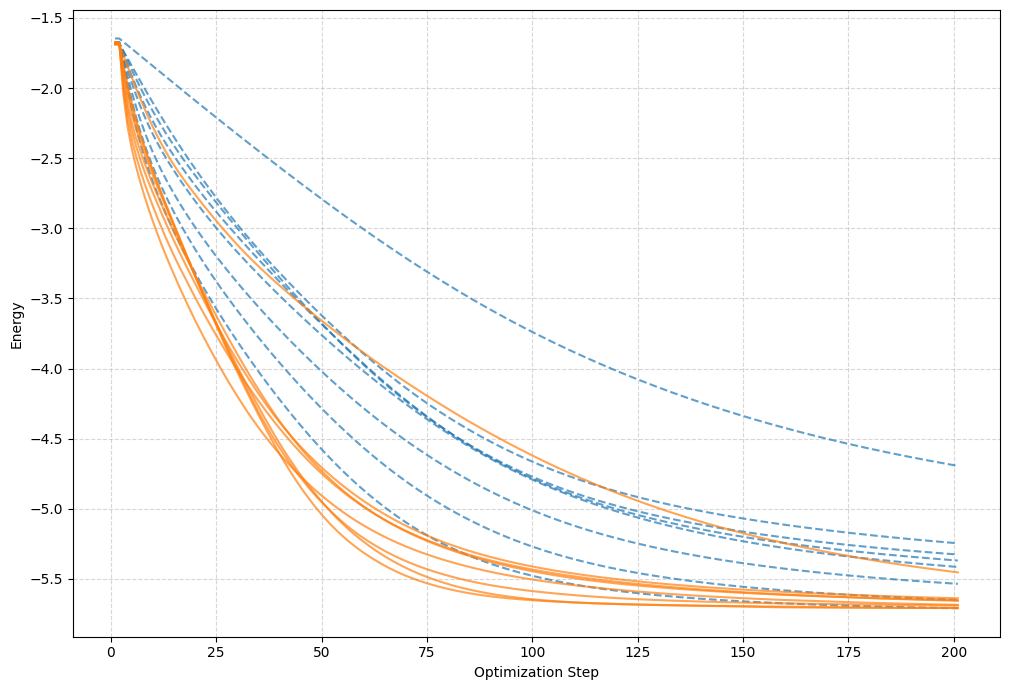

In [49]:
# --- Plotting Code ---
plt.figure(figsize=(12, 7)) # Increased figure width to accommodate the legend

steps1 = np.arange(1, mean_loss_hee.shape[1] + 1)
steps2 = np.arange(1, mean_loss_ng.shape[1] + 1)

# Loop to plot and label each 'Hardware Efficient' line
for i, variance_curve in enumerate(mean_loss_hee):
    # The label is now unique for each line (e.g., 'HE Run 1', 'HE Run 2')
    plt.plot(steps1, variance_curve, linestyle='--', color='C0', alpha=0.7, 
             label=f'Hardware Efficient w/ L={2*(i+1)}')

# Loop to plot and label each 'QResNet' line
for i, variance_curve in enumerate(mean_loss_ng):
    plt.plot(steps2, variance_curve, linestyle='-', color='C1', alpha=0.7, 
             label=f'QResNet w/ L={2*(i+1)}')

plt.xlabel('Optimization Step')
plt.ylabel('Energy')
plt.grid(True, which="both", ls="--", alpha=0.5)

# --- Legend Management ---
# Place the legend outside the plot area to the right to avoid clutter
#plt.legend(title='Individual Runs', bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust plot layout to make room for the external legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) 

plt.show()

In [50]:
exact_energy = -5.74032428
layers = np.arange(2, 31, 4)

In [51]:
min_hee = np.min(energies_hee, axis=1)[:,-1]
min_ng = np.min(energies_ng, axis=1)[:,-1]

In [52]:
min_ng

array([-5.70679998, -5.71207094, -5.71311903, -5.71468639, -5.71631241,
       -5.71597433, -5.71696424, -5.72024822])

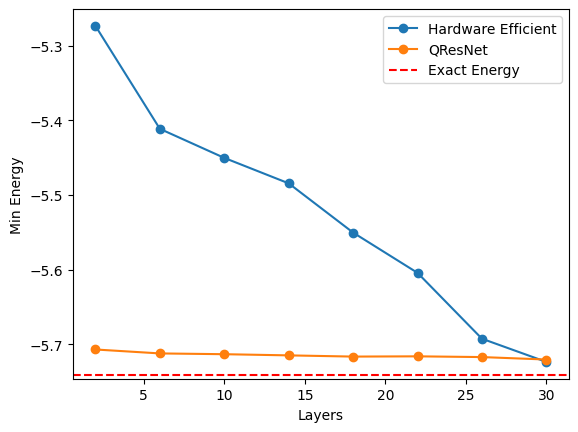

In [58]:
plt.plot(layers, min_hee, marker='o', label='Hardware Efficient')
plt.plot(layers, min_ng, marker='o', label='QResNet')
plt.axhline(exact_energy, color='r', linestyle='--', label='Exact Energy')
plt.xlabel('Layers')
plt.ylabel('Min Energy')
plt.legend()
plt.show()

In [54]:
median_hee = np.median(energies_hee, axis=1)[:,-1]
median_ng = np.median(energies_ng, axis=1)[:,-1]

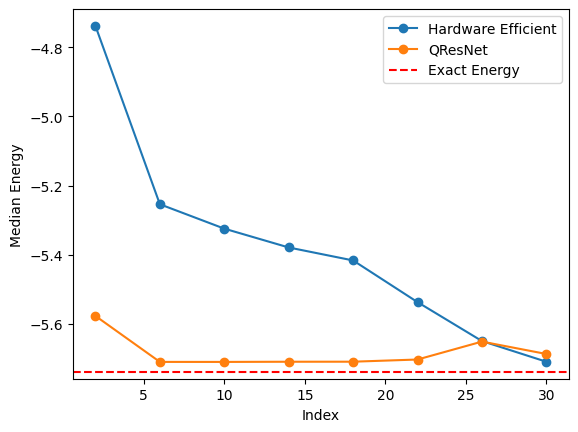

In [55]:
plt.plot(layers, median_hee, marker='o', label='Hardware Efficient')
plt.plot(layers, median_ng, marker='o', label='QResNet')
plt.axhline(exact_energy, color='r', linestyle='--', label='Exact Energy')
plt.xlabel('Index')
plt.ylabel('Median Energy')
plt.legend()
plt.show()

In [56]:
mean_var_hee = np.mean(grad_variances_hee, axis=1)
mean_var_ng = np.mean(grad_variances_ng, axis=1)

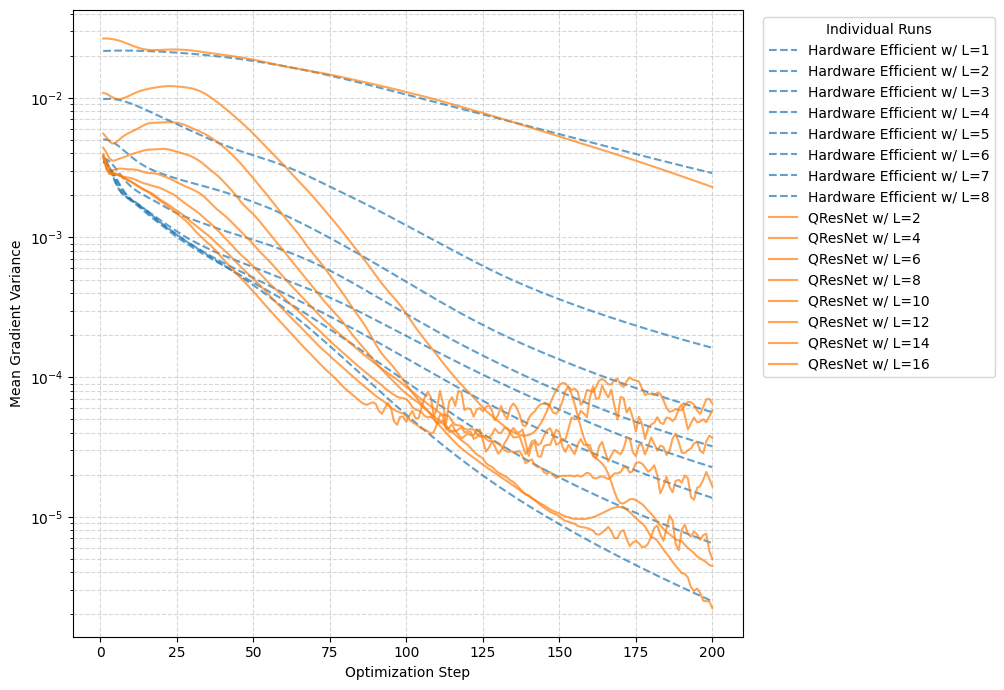

In [57]:
# --- Plotting Code ---
plt.figure(figsize=(12, 7)) # Increased figure width to accommodate the legend

steps1 = np.arange(1, mean_var_hee.shape[1] + 1)
steps2 = np.arange(1, mean_var_ng.shape[1] + 1)

# Loop to plot and label each 'Hardware Efficient' line
for i, variance_curve in enumerate(mean_var_hee):
    # The label is now unique for each line (e.g., 'HE Run 1', 'HE Run 2')
    plt.plot(steps1, variance_curve, linestyle='--', color='C0', alpha=0.7, 
             label=f'Hardware Efficient w/ L={i+1}')

# Loop to plot and label each 'QResNet' line
for i, variance_curve in enumerate(mean_var_ng):
    plt.plot(steps2, variance_curve, linestyle='-', color='C1', alpha=0.7, 
             label=f'QResNet w/ L={2*(i+1)}')

plt.yscale('log')
plt.xlabel('Optimization Step')
plt.ylabel('Mean Gradient Variance')
plt.grid(True, which="both", ls="--", alpha=0.5)

# --- Legend Management ---
# Place the legend outside the plot area to the right to avoid clutter
plt.legend(title='Individual Runs', bbox_to_anchor=(1.02, 1), loc='upper left')

# Adjust plot layout to make room for the external legend
plt.tight_layout(rect=[0, 0, 0.85, 1]) 

plt.show()